In [1]:
import pandas as pd
import matplotlib.pylab as plt 

In [2]:
Univ = pd.read_csv("Universities.csv")

In [3]:
# Normalization function 

In [4]:
def norm_func(i):
    x = (i-i.mean())/(i.std())
    return (x)

In [5]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(Univ.iloc[:,1:])

In [6]:
from scipy.cluster.hierarchy import linkage 

import scipy.cluster.hierarchy as sch # for creating dendrogram 


In [7]:
type(df_norm)

pandas.core.frame.DataFrame

In [8]:
z = linkage(df_norm, method="complete",metric="euclidean")


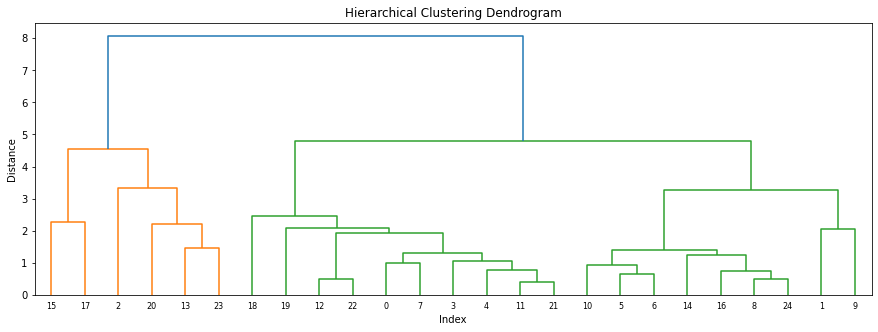

In [12]:
plt.figure(figsize=(15, 5));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(
    z,
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [13]:
# Now applying AgglomerativeClustering choosing 3 as clusters from the dendrogram
from	sklearn.cluster	import	AgglomerativeClustering 
h_complete	=	AgglomerativeClustering(n_clusters=3,	linkage='complete',affinity = "euclidean").fit(df_norm) 


In [14]:
cluster_labels=pd.Series(h_complete.labels_)


In [15]:
Univ['clust']=cluster_labels # creating a  new column and assigning it to new column 
Univ = Univ.iloc[:,[7,0,1,2,3,4,5,6]]
Univ.head()

,clust,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,2,Brown,1310,89,22,13,22704,94
1,1,CalTech,1415,100,25,6,63575,81
2,0,CMU,1260,62,59,9,25026,72
3,2,Columbia,1310,76,24,12,31510,88
4,2,Cornell,1280,83,33,13,21864,90


In [16]:
# getting aggregate mean of each cluster
Univ.iloc[:,2:].groupby(Univ.clust).median()


,SAT,Top10,Accept,SFRatio,Expenses,GradRate
clust,,,,,,
0,1083.0,44.5,67.5,17.0,11021.0,71.5
1,1375.0,91.0,23.0,10.0,36450.0,95.0
2,1270.0,80.5,37.5,13.0,22284.0,90.0


In [17]:
# creating a csv file 
Univ.to_csv("University.csv",encoding="utf-8")
